# Distribución Uniforme

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import seaborn.objects as so
from scipy.stats import uniform

En la forma estándar, la distribución es uniforme en x=0 e y=1. 
+ Utilizando los parámetros "loc" and "scale y , se obtiene la distribución uniforme en loc y loc+scale.
+ por eso en su forma estandard uniform devuelve los estadisticos de [0,1]

### Duración de la clase
Un profesor de estadística planea sus clases con tanto cuidado que sus duraciones están distribuidas uniformemente entre 50.0 y 52.0 min.  
+ Esto es, cualquier tiempo entre 50.0 y 52.0 min es posible, y todos los valores posibles tienen la misma probabilidad. 
+ Si seleccionamos aleatoriamente una de las clases y permitimos que x sea la variable aleatoria que representa la duración de esa clase, 
    + entonces todos los valores entre 50 y 52, tienen la misma probabilidad y esta probabilidad es....

Para resover este problema tengamos en cuenta que:
+ a = 50
+ b = 52
+ b - a = 2

Es decir que la función de distribución no es estandard sino que:
+ está corrida a x = a o (x = 50).
+ tiene un rango de b - a = 2
+ los valores de x van de a hasta b con la granularidad deseada por ser continua (ej. 1000)

In [2]:
# Parámetros de la distribución uniforme
a = 50.0  # límite inferior
b = 52.0  # límite superior
loc = a
scale = b - a

# Generar valores de x
x = np.linspace(a, b, 1000)

En Scipy la distribución uniforme se crea con estos parametros a y b-a.

In [3]:
# Crear la distribución uniforme
dist = uniform(loc, scale)

# Calcular por ejemplo la distribución de probabilidad PDF
pdf = dist.pdf(x)

# Ver los estadísticos de la distribución
dist.stats()


(51.0, 0.3333333333333333)

Con la función de distribución creada es posible crear las distribuciones:
+ Probabilidad
+ Acumulada
+ Supervivencia
+ otras.

In [4]:
# Creación de un dataframe con los valores de x, probabilidad, acumulada y supervivencia
df = pd.DataFrame(
    {
        "x"   : x,
        "p"   : dist.pdf(x),
        "ac"  : dist.cdf(x),
        "1-ac": dist.sf(x),
    }
)
df.round(4)

,x,p,ac,1-ac
0,50.000,0.5,0.000,1.000
1,50.002,0.5,0.001,0.999
2,50.004,0.5,0.002,0.998
3,50.006,0.5,0.003,0.997
4,50.008,0.5,0.004,0.996
...,...,...,...,...
995,51.992,0.5,0.996,0.004
996,51.994,0.5,0.997,0.003
997,51.996,0.5,0.998,0.002
998,51.998,0.5,0.999,0.001


+ Si seleccionamos aleatoriamente una de las clases y permitimos que x sea la variable aleatoria que representa la duración de esa clase, entonces x tiene una distribución que puede graficarse como en la figura.

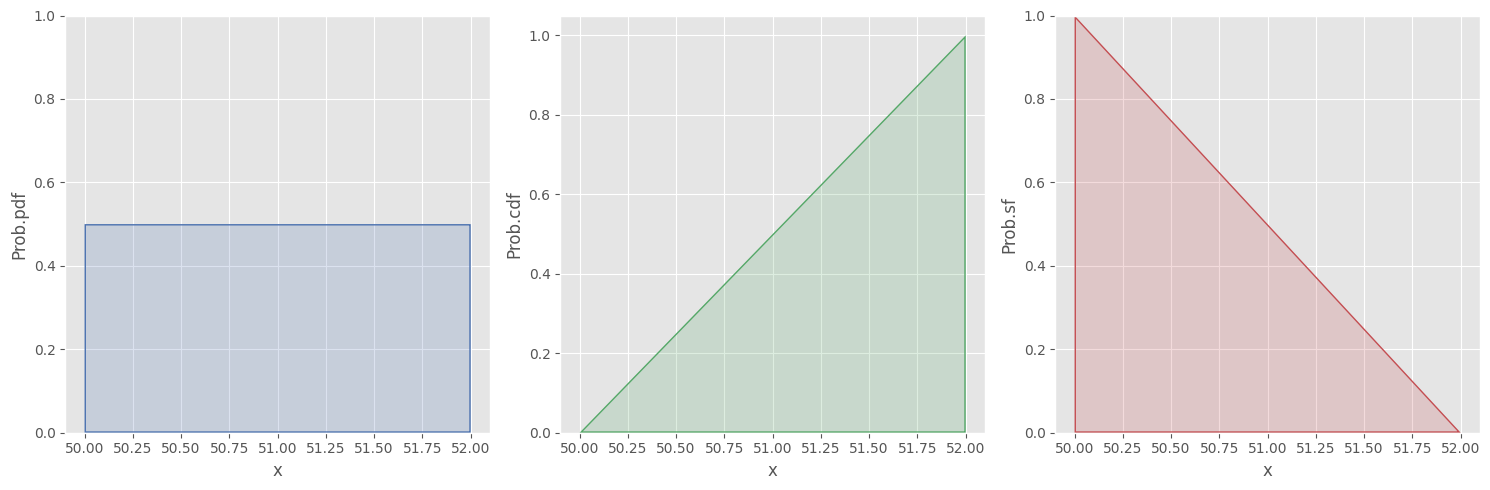

In [5]:
# Creación del grafico con seaborn objects y matplotlib
import matplotlib.pyplot as plt
from matplotlib import style

# Aplicar un estilo
# print(style.available) # use esta línea para ver estilos disponible junto con from matplotlib import style
plt.style.use('ggplot')
# Crear la figura con subfiguras
fig, (sf1, sf2, sf3) = plt.subplots(1, 3, figsize=(15, 5))

# Graficar en la primera subfigura
plot1 = (
    so.Plot(df, x="x", y="p")
    .add(so.Area())
    .label(x="x", y="Prob.pdf")
    .on(sf1)
)
plot1.plot()
sf1.set_ylim(0, 1)

# Graficar en la segunda subfigura
plot2 = (
    so.Plot(df, x="x", y="ac")
    .add(so.Area(color='C2'))
    .label(x="x", y="Prob.cdf")
    .on(sf2)
)
plot2.plot()

# Graficar en la tercera subfigura
plot3 = (
    so.Plot(df, x="x", y="1-ac")
    .add(so.Area(color='C3'))
    .label(x="x", y="Prob.sf")
    .on(sf3)
)
plot3.plot()
sf3.set_ylim(0, 1)

# Ajustar diseño
fig.tight_layout()
plt.show()

#### Consultas
Kim, quien tiene el hábito de vivir siempre de prisa, se comprometió a acudir a una entrevista de trabajo inmediatamente después de su clase de estadística. 
+ Si la clase dura más de 51.5 minutos, llegará tarde a la entrevista de trabajo. 
+ Dada la distribución uniforme de la figura, calcule la probabilidad de que una clase seleccionada al azar dure más de 51.5 minutos.

Si observamos el gráfico, la distribución se divide en 8 octavos (8/8) o cuatro cuartos (4/4) a lo largo de x.
+ 2 minutos divididos en cuatro partes da 0,5.
    + mas de 51,5 minutos implica el area que va de 51,5 hasta 52. Esto implica 0,5 minutos.
    + y 0,5 minutos por una probabilidad de 0,5 es igual a 0,25.

In [6]:
# Cálculo de la probabilidad de tardar más de 51,5 minutos

t = 51.5
# a. Mediante la función inversa a la acumulada
t_sf = df[df["x"] > 51.5]['1-ac'].max().round(3)

# b. Mediante la función acumulada
t_ac = df[df["x"] <= 51.5]['ac'].max().round(3)
t_ac_inv = 1- t_ac

print(f"Cálculo de la Probabilidad mayor o igual a {t}:")
print(f"a. Por función Survival (sf)            : {t_sf}")
print(f"b. Por función Acumulada Inversa (1-cdf): {t_ac_inv}")
# df["x"] < 51.5
df['t'] = df.apply(lambda row: 0 if row['x'] < t else row['p'], axis=1)

Cálculo de la Probabilidad mayor o igual a 51.5:
a. Por función Survival (sf)            : 0.249
b. Por función Acumulada Inversa (1-cdf): 0.25


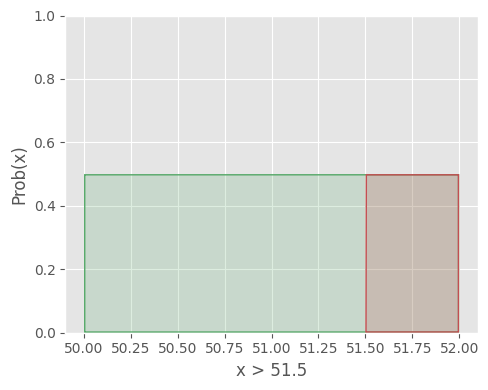

In [7]:
# Creación del grafico con seaborn objects y matplotlib
import matplotlib.pyplot as plt
# from matplotlib import style

# Aplicar un estilo
# print(style.available) # use esta línea para ver estilos disponible junto con from matplotlib import style
plt.style.use('ggplot')
# Crear la figura con subfiguras
fig, (sf1) = plt.subplots(1, figsize=(5, 4))

# Graficar en la primera subfigura
plot1 = (
    so.Plot(df, x="x", y="p")
    .add(so.Area(color='g'))
    .label(x="x", y="Prob.pdf")
    .on(sf1)
)
plot1.plot()
sf1.set_ylim(0, 1)

# Graficar en la segunda subfigura
plot2 = (
    so.Plot(df, x="x", y="t")
    .add(so.Area(color='r'))
    .label(x="x > " + str(t), y="Prob(x)")
    .on(sf1)
)
plot2.plot()

# Ajustar diseño
fig.tight_layout()
plt.show()

In [8]:
# Función de Distribución de Probabilidad Normal - Visualización del área del calculo y resultados
def distr_conti(dist, a=None, b=None, between=True):
    """
     Función: Esta función grafica:
     1. La curva de distribución uniforme de probabilidad entre x_min y x_max
     2. El área de probabilidad acumulada bajo la curva entre a y b
     3. Coloca paremetros y resultados en el gráfico
     Argumentos:
     a: Límite inferior del rango de probabilidad buscado
     b: Límite superior del rango de probabilidad buscado
     between: True indica probabilidad entre a y b. False indica probabilidad fuera de a y b.
     Paremetros:
     x_rango: es el rango de x correspondiente a la curva de distribución.
     a: Límite inferior del rango de probabilidad buscado
     b: Límite superior del rango de probabilidad buscado
     Consideraciones sobre los parámetros a y b:
     + si se especifica a y b, la probabilidad acumulada entre a y b
     + si no se especifica ni a ni b, la función calcula la brobabilidad total entre minimo y maximo, es decir 100%
     + si no se especifica a, la función calcula desde el mínimo de la distribución hasta el limite b o el máximo.
     + si no se especifica b la función calcula desde a hasta el máximo
    """

    # Rango de x de la funcion de distribución normal
    # Como la distribución es normal distribuye los valores desde negativos hasta positivos con media cero
    x_min = dist.ppf(0.00001) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
    x_max = dist.ppf(0.99999) # devuelve el valor de probabilidad correspondiente al percentil especificado como argumento
    x_rango = np.linspace(x_min, x_max, 10000)  # rango de valores del eje x
    
    # Rango de x entre a y b
    a = x_min if a is None else a 
    b = x_max if b is None else b
    
    ### Líneas de debug
    # print(f"a:{a}, b:{b}")
    # cdfa = dist.cdf(a)
    # cdfb = dist.cdf(b)
    # cdfab = cdfb-cdfa
    # print(f"dist.cdf(b):{cdfa}")
    # print(f"dist.cdf(b):{cdfb}")
    # print(f"cdf a-b : {cdfab}")
    
    # Calculo del rango de x entre a y b que estoy buscando
    if between:
        ab_rango = np.linspace(a, b, 1000) # rango de valores de probabilidad acumulada buscado
    else:
        a_rango = np.linspace(x_min, a, 1000)
        b_rango = np.linspace(b, x_max, 1000)

    # Genero la plantilla del grafico
    fig, ax = plt.subplots(1, 1, figsize = (7,4))

    # Dibujo la distribución normal
    ax.plot(x_rango, dist.pdf(x_rango), 'k-', lw=2, alpha=0.6, label='norm pdf')

    # Sombreado del área bajo la curva de interés
    if between :
        ax.fill_between(ab_rango, 0, dist.pdf(ab_rango), color='blue', alpha=0.2, label='Área bajo la curva')
    else :
        ax.fill_between(a_rango, 0, dist.pdf(a_rango), color='blue', alpha=0.2, label='Área bajo la curva')
        ax.fill_between(b_rango, 0, dist.pdf(b_rango), color='blue', alpha=0.2, label='Área bajo la curva')

    # Dibujar las líneas punteadas en pdf(a), pdf(b)
    ax.plot([a, a], [0, dist.pdf(a)], linestyle="dashed")
    ax.plot([b, b], [0, dist.pdf(b)], linestyle="dashed")

    # Añadir texto de valor de variable "a" y su probabilidad "p(a)"
    if a > x_min:
        ax.text(a, -0.02, f'x={a:.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de x=a
        ax.text(a, dist.pdf(a), f'p={dist.pdf(a):.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de p(ba
    
    # Añadir texto de valor de variable "b" y su probabilidad "p(b)"
    if b < x_max:
        ax.text(b, -0.02, f'x={b:.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de x=b
        ax.text(b, dist.pdf(b), f'p={dist.pdf(b):.2f}', ha='center', va='bottom', color='red', fontsize=8)   # Añade valor de p(b)

    # Añadir texto probabilidad acumulada en el centro del gráfico
    x_centro = (x_rango.max() + x_rango.min()) / 2 # Punto medio del eje X
    y_centro = 0.14  # Valor arbitrario en el eje Y (cerca del centro de la distribución)
    if between:
        ax.text(x_centro, y_centro, f"{(dist.cdf(b)-dist.cdf(a))*100:.1f}%", ha='center', va='center', fontsize=10, color='red')
    else:
        ax.text(x_centro, y_centro, f"{(dist.sf(b)+dist.cdf(a))*100:.1f}%", ha='center', va='center', fontsize=10, color='red')

    # Personalización del gráfico
    # ax.set_title('Distribución Normal Estandard')
    ax.set_xlabel('x')
    # ax.set_ylabel('Densidad de probabilidad')
    # ax.legend()
    # plt.grid(True)

    ax.set_yticks([])

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.spines['bottom'].set_color('gray')

    plt.show()


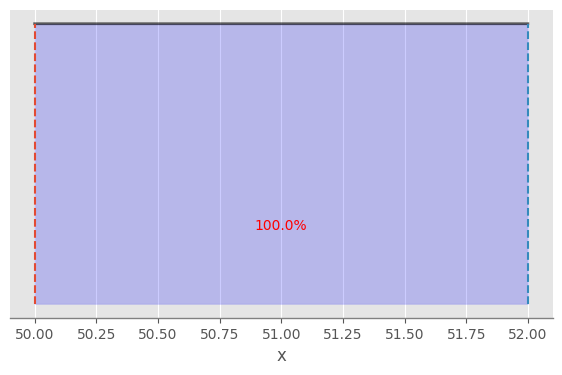

In [9]:
distr_conti(uniform(loc, scale))

¿Cual es la probabilidd de que la clase tarde menos que 51,5 minutos?

Mirando los gráficos anteriores se puede suponer que la probabilidad será mayor que 0,5 ya que la probabilidad de 0,5 esta justo en la mediai que se ve que es 51 minutos.
+ probablemente cerca de 75%

Datos de la Tabla cercanos a 51.5:
             x    p        ac      1-ac    t
745  51.491491  0.5  0.745746  0.254254  0.0
746  51.493493  0.5  0.746747  0.253253  0.0
747  51.495495  0.5  0.747748  0.252252  0.0
748  51.497497  0.5  0.748749  0.251251  0.0
749  51.499499  0.5  0.749750  0.250250  0.0

Probabilidad de tardar menos de 51,5 minutos: 0.75


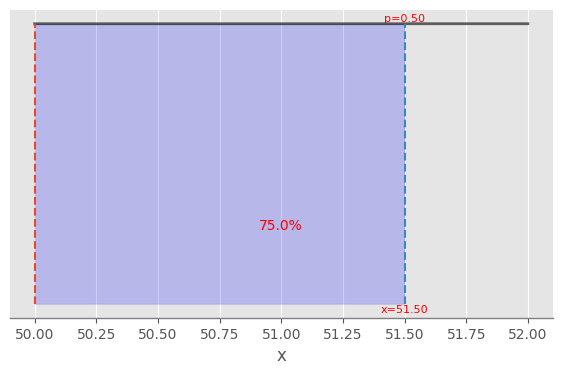

In [34]:
# Probabilidad de tardar menos de 51.5 minutos
print("Datos de la Tabla cercanos a 51.5:")
print(df[df.x <= 51.5].tail())
print(f"\nProbabilidad de tardar menos de 51,5 minutos: {dist.cdf(51.5)}")
distr_conti(uniform(loc, scale), b=51.5)

¿Cual es la probabilidd de que la clase tarde más que 51,5 minutos?


Probabilidad de tardar más de 51,5 minutos: 0.25


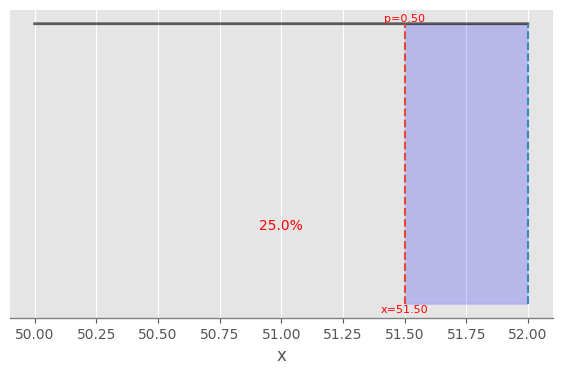

In [35]:
# Probabilidad de tardar menos más de 51.5 minutos
print(f"\nProbabilidad de tardar más de 51,5 minutos: {dist.sf(51.5)}")
distr_conti(uniform(loc, scale), a=51.5)

¿Cuál es la probabilidd de que la clase tarde entre la media menos un devío estandar y la media más un desvío estandard?

La función de distribución uniforme en este caso va entre a y b: 50.0 y 52.0.
La media es: 51.0 y el desvío estandard es: 0.5773502691896257
La probabilidad de tardar entre la media menos 1 std y la media mas 1 std es : 0.5773502691896226


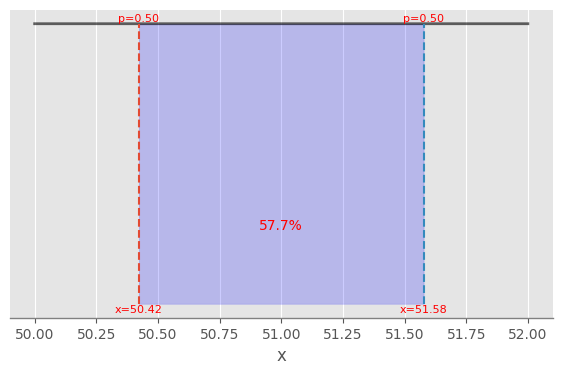

In [36]:
# Probabilidad de tardar entte media-1std y media+1std
print(f"La función de distribución uniforme en este caso va entre a y b: {a} y {b}.")
mean = uniform(loc, scale).mean()
std = uniform(loc, scale).std()
print(f"La media es: {mean} y el desvío estandard es: {std}")
print(f"La probabilidad de tardar entre la media menos 1 std y la media mas 1 std es : {dist.cdf(mean+std)-dist.cdf(mean-std)}")
distr_conti(uniform(loc, scale), a=(mean-std), b=(mean+std))

¿Cuál es la probabilidd de que la clase tarde entre la media menos dos devío estandar y la media más dos desvíos estandard?

La media es: 51.0 y el desvío estandard es: 0.5773502691896257. Por lo que 2 std es: 1.1547005383792515
La probabilidad de tardar entre la media menos 1 std y la media mas 1 std es : 1.0


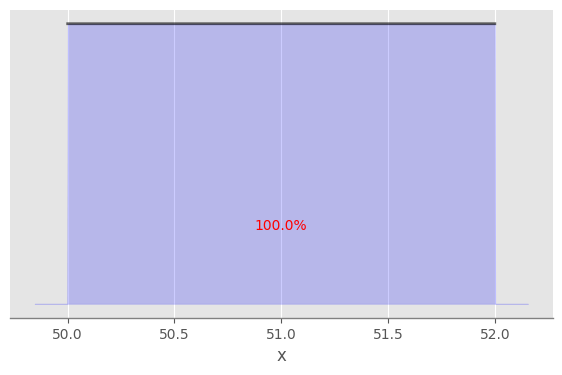

In [28]:
dist.cdf(mean+2*std)-dist.cdf(mean-2*std)
print(f"La media es: {mean} y el desvío estandard es: {std}. Por lo que 2 std es: {2*std}")
print(f"La probabilidad de tardar entre la media menos 1 std y la media mas 1 std es : {dist.cdf(mean+2*std)-dist.cdf(mean-2*std)}")
distr_conti(uniform(loc, scale), a=(mean-2*std), b=(mean+2*std))

__________________________________________________________________________________________________________________________________________________________________________